In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils


from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Initial Setup ##

In [177]:
xl = pd.ExcelFile("merged1.xlsx")
xl.sheet_names

['Sheet1']

In [178]:
df = xl.parse("Sheet1")
df.head()

,1574553619579,13.355469,-13.603123,-35.13745,0,0.1,0.2,0.3,0.4,0.5,2
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2


In [179]:
df.columns = ["timestamp", "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z", "label"]

In [180]:
df.head()

,timestamp,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,label
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40133 entries, 0 to 40132
Data columns (total 11 columns):
timestamp    40133 non-null int64
magneto_x    40133 non-null float64
magneto_y    40133 non-null float64
magneto_z    40133 non-null float64
gyro_x       40133 non-null float64
gyro_y       40133 non-null float64
gyro_z       40133 non-null float64
accel_x      40132 non-null float64
accel_y      40133 non-null float64
accel_z      40133 non-null float64
label        40133 non-null int64
dtypes: float64(9), int64(2)
memory usage: 3.4 MB


In [182]:
df.isnull().sum()

timestamp    0
magneto_x    0
magneto_y    0
magneto_z    0
gyro_x       0
gyro_y       0
gyro_z       0
accel_x      1
accel_y      0
accel_z      0
label        0
dtype: int64

In [183]:
df = df.dropna()

In [184]:
df.isnull().sum()

timestamp    0
magneto_x    0
magneto_y    0
magneto_z    0
gyro_x       0
gyro_y       0
gyro_z       0
accel_x      0
accel_y      0
accel_z      0
label        0
dtype: int64

In [185]:
df

,timestamp,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z,label
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2
...,...,...,...,...,...,...,...,...,...,...,...
40128,1574552392407,22.936758,-40.710567,-18.845306,-0.125934,-0.042764,-0.027161,0.088342,7.281892,6.300311,0
40129,1574552392483,22.936758,-40.710567,-18.845306,-0.125934,-0.042764,-0.027161,-0.112044,6.958927,6.902426,0
40130,1574552392562,22.629631,-39.763744,-20.649406,-0.125934,-0.042764,-0.027161,-0.112044,6.958927,6.902426,0
40131,1574552392599,22.629631,-39.763744,-20.649406,-0.238272,0.067069,0.047121,-0.112044,6.958927,6.902426,0


## Random Forrest Implementation: All Features ##

In [186]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]
X.head()

,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702
1,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
2,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
3,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886
4,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886


In [187]:
target = ["label"]
y = df[target]
y.head()

,label
0,2
1,2
2,2
3,2
4,2


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [190]:
temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9928989659897844
Model score for no of trees 2  is :  0.9925252273576679
Model score for no of trees 3  is :  0.9976329886632614
Model score for no of trees 4  is :  0.996262613678834
Model score for no of trees 5  is :  0.9986296250155724
Model score for no of trees 6  is :  0.9985050454715336
Model score for no of trees 7  is :  0.9987542045596113
Model score for no of trees 8  is :  0.998131306839417
Model score for no of trees 9  is :  0.9985050454715336
Model score for no of trees 10  is :  0.9988787841036502
Model score for no of trees 11  is :  0.9986296250155724
Model score for no of trees 12  is :  0.9988787841036502
Model score for no of trees 13  is :  0.9988787841036502
Model score for no of trees 14  is :  0.9987542045596113
Model score for no of trees 15  is :  0.999003363647689
Model score for no of trees 16  is :  0.9992525227357668
Model score for no of trees 17  is :  0.9992525227357668
Model score for no of trees 18  is :  0.999

## Random Forrest Implementation: Magnetometer Data Only ##

In [191]:
features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9935215946843854
Model score for no of trees 2  is :  0.9943521594684386
Model score for no of trees 3  is :  0.998671096345515
Model score for no of trees 4  is :  0.9960132890365448
Model score for no of trees 5  is :  0.9975913621262459
Model score for no of trees 6  is :  0.997093023255814
Model score for no of trees 7  is :  0.9980066445182725
Model score for no of trees 8  is :  0.9980066445182725
Model score for no of trees 9  is :  0.9985049833887043
Model score for no of trees 10  is :  0.998172757475083
Model score for no of trees 11  is :  0.9985049833887043
Model score for no of trees 12  is :  0.9985880398671096
Model score for no of trees 13  is :  0.9987541528239202
Model score for no of trees 14  is :  0.9987541528239202
Model score for no of trees 15  is :  0.9983388704318937
Model score for no of trees 16  is :  0.9988372093023256
Model score for no of trees 17  is :  0.9985880398671096
Model score for no of trees 18  is :  0.999

In [192]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
X.describe()

,magneto_x,magneto_y,magneto_z
count,40132.000000,40132.000000,40132.000000
mean,6.764817,-27.308542,-17.445501
std,24.577832,17.800359,8.064402
min,-38.560730,-49.372220,-38.063340
25%,-29.429829,-40.267840,-21.397568
50%,20.214737,-38.411144,-17.861351
75%,23.263060,-10.220844,-10.456291
max,38.912956,9.878616,1.384033


## Principal Component Analysis and K Means: Magnetometer Only ##

In [194]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [195]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.417055,23.299065,1.122447
1,-0.417055,23.299065,1.122447
2,-0.462859,23.582844,0.632686
3,-0.462859,23.582844,0.632686
4,-0.462859,23.582844,0.632686
...,...,...,...
40127,-20.886767,-2.613422,-0.135508
40128,-20.886767,-2.613422,-0.135508
40129,-20.393368,-0.731843,-0.815064
40130,-20.393368,-0.731843,-0.815064


In [196]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

[0.92975484 0.06418304 0.00606212]


In [197]:
df = df.reset_index()
principalDf = principalDf.reset_index()

finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
# finalDf = finalDf.dropna()
# finalDf.reset_index()
finalDf

,index,principal component 1,principal component 2,principal component 3,label
0,0,-0.417055,23.299065,1.122447,2
1,1,-0.417055,23.299065,1.122447,2
2,2,-0.462859,23.582844,0.632686,2
3,3,-0.462859,23.582844,0.632686,2
4,4,-0.462859,23.582844,0.632686,2
...,...,...,...,...,...
40127,40127,-20.886767,-2.613422,-0.135508,0
40128,40128,-20.886767,-2.613422,-0.135508,0
40129,40129,-20.393368,-0.731843,-0.815064,0
40130,40130,-20.393368,-0.731843,-0.815064,0


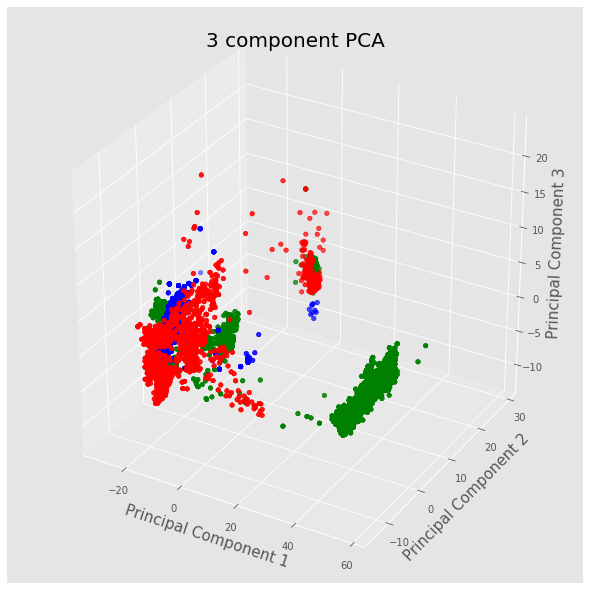

In [198]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['label']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)


In [199]:
y

,label
0,2
1,2
2,2
3,2
4,2
...,...
40128,0
40129,0
40130,0
40131,0


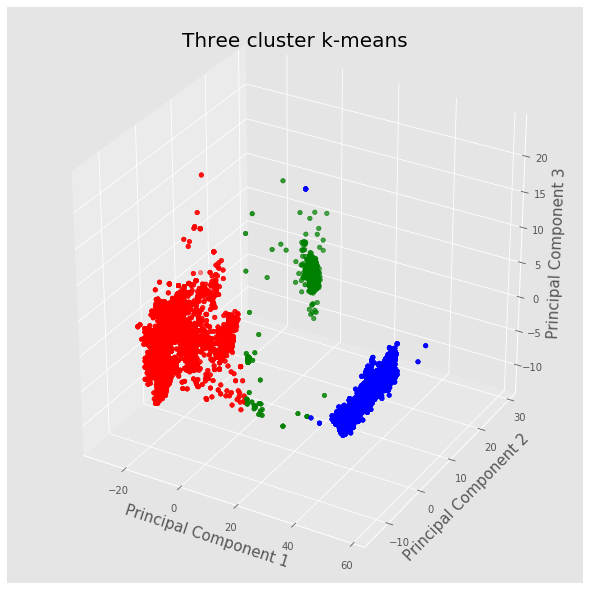

In [200]:
kmean = KMeans(n_clusters=3).fit(X)
cl = kmean.cluster_centers_

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three cluster k-means', fontsize = 20)


LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}


label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )
# ax.scatter(cl[0][0], cl[0][1], s=80, marker=">", color = 'black')
# ax.scatter(cl[1][0], cl[1][1], s=80, marker=">", color = 'black')

## PCA and K means with all sensors ##

In [201]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]

In [202]:
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 
                          'principal component 4', 'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8', 'principal component 9'
                         ])

principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,-0.243432,23.824757,1.134035,0.549228,0.035343,-0.005099,-0.005220,-0.003516,-0.002282
1,-0.243432,23.824758,1.134035,0.549217,0.035345,-0.005095,-0.004236,-0.001742,-0.002481
2,-0.288663,24.104245,0.652263,0.476568,-0.025303,0.030587,-0.003999,-0.002381,-0.003084
3,-0.288216,24.103606,0.653027,0.471110,-0.023244,0.038858,-0.004169,-0.002361,-0.003217
4,-0.288216,24.103606,0.653028,0.471111,-0.023241,0.038869,-0.003671,-0.002594,-0.003240
...,...,...,...,...,...,...,...,...,...
40127,-21.113158,-2.905879,0.007545,-1.085295,-0.637440,0.691566,-0.051041,-0.132469,0.003452
40128,-21.111513,-2.788568,-0.063315,-0.533090,-0.410024,0.328956,-0.045044,-0.130752,0.010256
40129,-20.621130,-0.946713,-0.701267,-0.816822,-0.756081,0.402572,-0.044176,-0.133563,0.008371
40130,-20.621126,-0.946731,-0.701079,-0.816039,-0.755223,0.404492,0.076158,-0.239587,-0.058520


[9.27916589e-01 6.54900458e-02 6.01496719e-03 3.23712752e-04
 1.27366291e-04 9.48848596e-05 1.44608149e-05 9.93169326e-06
 8.04167510e-06]


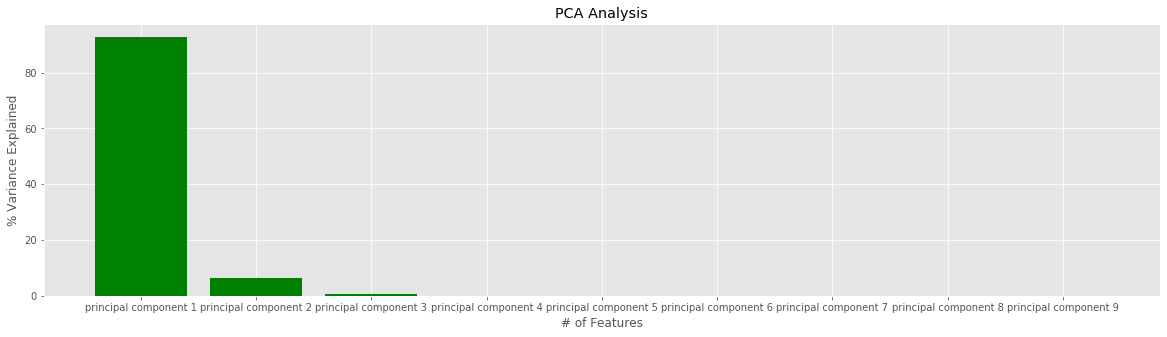

In [203]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

var=np.round(variance, decimals=3)*100


plt.figure(figsize = (20,5))

plt.style.use('ggplot')
x_pos = [i for i, _ in enumerate(principalDf.columns)]

plt.bar(x_pos, var, color='green')
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')

plt.xticks(x_pos, principalDf.columns)

plt.show()

In [204]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,label
0,-0.243432,23.824757,1.134035,0.549228,0.035343,-0.005099,-0.005220,-0.003516,-0.002282,2
1,-0.243432,23.824758,1.134035,0.549217,0.035345,-0.005095,-0.004236,-0.001742,-0.002481,2
2,-0.288663,24.104245,0.652263,0.476568,-0.025303,0.030587,-0.003999,-0.002381,-0.003084,2
3,-0.288216,24.103606,0.653027,0.471110,-0.023244,0.038858,-0.004169,-0.002361,-0.003217,2
4,-0.288216,24.103606,0.653028,0.471111,-0.023241,0.038869,-0.003671,-0.002594,-0.003240,2
...,...,...,...,...,...,...,...,...,...,...
40127,-21.113158,-2.905879,0.007545,-1.085295,-0.637440,0.691566,-0.051041,-0.132469,0.003452,0
40128,-21.111513,-2.788568,-0.063315,-0.533090,-0.410024,0.328956,-0.045044,-0.130752,0.010256,0
40129,-20.621130,-0.946713,-0.701267,-0.816822,-0.756081,0.402572,-0.044176,-0.133563,0.008371,0
40130,-20.621126,-0.946731,-0.701079,-0.816039,-0.755223,0.404492,0.076158,-0.239587,-0.058520,0


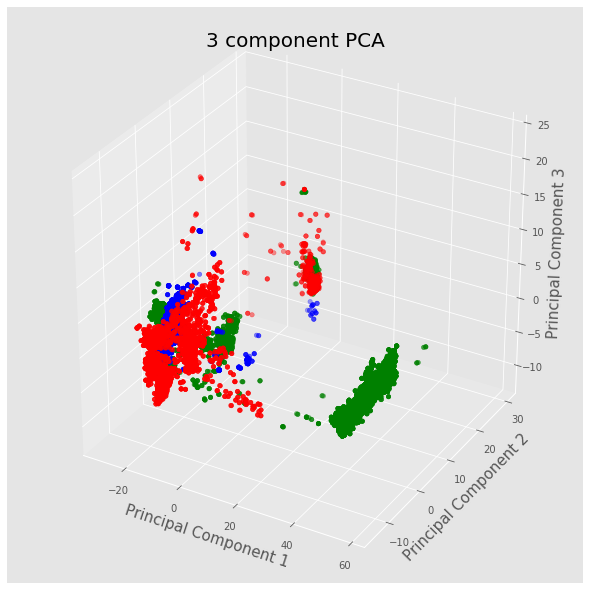

In [205]:
fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('3 component PCA', fontsize = 20)

LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['label']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)

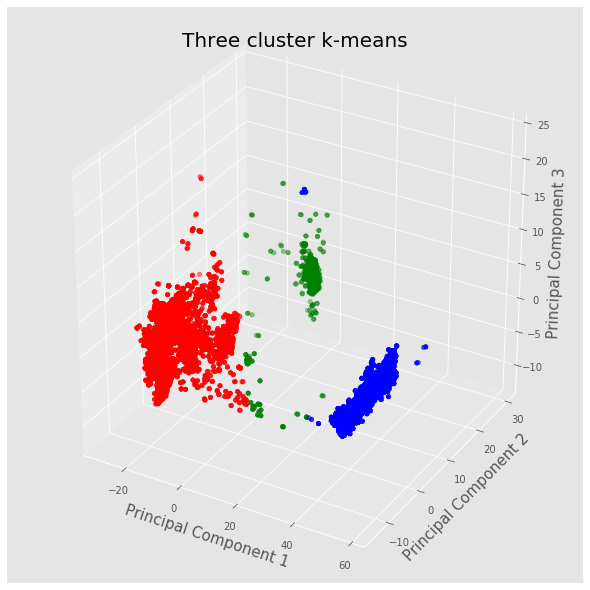

In [206]:
kmean = KMeans(n_clusters=3).fit(X)
cl = kmean.cluster_centers_

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('Three cluster k-means', fontsize = 20)


LABEL_COLOR_MAP = {0 : 'r', 1 : 'b', 2 :'g'}


label_color = [LABEL_COLOR_MAP[l] for l in kmean.labels_]
ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3']
             , c=label_color  )


## Random Forrest magnetometer only using cross validation ##

In [207]:
k_fold_summary = []

features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    scores = cross_val_score(model, X=X, y=y, cv=5, n_jobs=4)
    k_fold_summary.append((i,scores.mean()))
    print("Model score for no of trees",i," is : ",scores.mean())

Model score for no of trees 1  is :  0.721048751391205
Model score for no of trees 2  is :  0.6824544401834507
Model score for no of trees 3  is :  0.7183334326660841
Model score for no of trees 4  is :  0.7288739145187255
Model score for no of trees 5  is :  0.7342562971800084
Model score for no of trees 6  is :  0.7393644527644293
Model score for no of trees 7  is :  0.7331845157397107
Model score for no of trees 8  is :  0.7346294428896527
Model score for no of trees 9  is :  0.7459915008291651
Model score for no of trees 10  is :  0.7488823113002819
Model score for no of trees 11  is :  0.7408342244150321
Model score for no of trees 12  is :  0.7400608781883101
Model score for no of trees 13  is :  0.7543137496986966
Model score for no of trees 14  is :  0.7565072996640674
Model score for no of trees 15  is :  0.7532681290676904
Model score for no of trees 16  is :  0.7412073918601136
Model score for no of trees 17  is :  0.7501777243152765
Model score for no of trees 18  is :  0.7

## Testing with separate data for testing ##

Test with just magnetometer data

In [230]:
features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

model = RandomForestClassifier(n_estimators=18)
# model.fit(X_train, temp_train)

y_ = y.values.reshape(-1,)
model.fit(X, y_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [231]:
# xl = pd.ExcelFile("newdata.xlsx")
# df_test = xl.parse("Sheet1")
# df_test.head()
xl = pd.ExcelFile("testdata.xlsx")
df_test = xl.parse("testdata")
df_test.columns = [ 'mxc', 'myc', 'mzc', 'gxc', 'gyc', 'gzc', 'axc', 'ayc', 'azc', 'targets']
features = ['mxc', 'myc', 'mzc']
X_pred = df_test[features]
y_pred = df_test['targets']
pred = model.predict(X_pred)
print("Accuracy: ",metrics.accuracy_score(y_pred, pred))

Accuracy:  0.18282604313646442


In [232]:
xl2 = pd.ExcelFile("newdata.xlsx")
df_test2 = xl2.parse("Sheet1")


# df_test2.columns = [ 'mxc', 'myc', 'mzc', 'gxc', 'gyc', 'gzc', 'axc', 'ayc', 'azc', 'targets']
features = ['mxc', 'myc', 'mzc']
X_pred = df_test2[features]
y_pred = df_test2['targets']
pred = model.predict(X_pred)
print("Accuracy: ",metrics.accuracy_score(y_pred, pred))

Accuracy:  0.3788403558169088


### Testing with all sensors ###

In [233]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]

target = ["label"]
y = df[target]

y_ = y.values.reshape(-1,)
model.fit(X, y_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [234]:
features = ['mxc', 'myc', 'mzc', 'gxc', 'gyc', 'gzc', 'axc', 'ayc', 'azc']
X_pred = df_test[features]
y_pred = df_test['targets']
pred = model.predict(X_pred)

In [235]:
print("Accuracy: ",metrics.accuracy_score(y_pred, pred))

Accuracy:  0.1928038701874622


In [236]:
X_pred = df_test2[features]
y_pred = df_test2['targets']
pred = model.predict(X_pred)
print("Accuracy: ",metrics.accuracy_score(y_pred, pred))

Accuracy:  0.4334587496573892
